In [113]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Librosa Libraries
import librosa
import librosa.display

import sklearn

import warnings
warnings.filterwarnings('ignore')


In [114]:
train_csv = pd.read_csv("./train_mod.csv")

In [115]:
train_csv['ebird_code']

0        aldfly
1        aldfly
2        aldfly
3        aldfly
4        aldfly
          ...  
21370    yetvir
21371    yetvir
21372    yetvir
21373    yetvir
21374    yetvir
Name: ebird_code, Length: 21375, dtype: object

In [116]:
bird_code = ['aldfly', 'amewoo', 'bktspa', 'brncre', 'bulori', 'canwre',
             'clanut', 'comyel', 'easkin', 'foxspa','greegr', 'hergul',
            'lesnig', 'magwar', 'normoc', 'palwar', 'plsvir', 'rethaw',
            'rufgro', 'stejay', 'norcar', 'haiwoo', 'amered','easblu', 'treswa']


In [122]:
BIRD_CODE = {
    'aldfly': 0, 'amewoo':1, 'bktspa':2, 'brncre':3, 'bulori':4, 'canwre':5,
    'clanut':6, 'comyel':7, 'easkin':8, 'foxspa':9,'greegr':10, 'hergul':11,
    'lesnig':12, 'magwar':13, 'normoc':14, 'palwar':15, 'plsvir':16, 'rethaw':17,
    'rufgro':18, 'stejay':19, 'norcar':20, 'haiwoo':21, 'amered':22,'easblu':23, 'treswa':24
}

In [117]:
train = train_csv.loc[train_csv['ebird_code'].isin(bird_code)]

In [120]:
train.to_csv('train_modify.csv', index=False)

In [59]:
train.duration.unique()

array([  25,   36,   39,   33,    7,   45,   71,   26,   54,  269,   31,
         19,    9,   29,   13,   16,  315,   46,   84,  136,   22,   58,
         56,   23,   17,   38,   72,   86,  103,  127,   41,  120,   21,
         42,  130,   69,   60,   78,  141,  188,   59,   20,  386,   82,
        149,   75,   70,  116,   66,   83,  105,   50,   62,   15,   11,
         73,   35,   51,   64,  245,   30,   14,    6,   96,  178,  177,
          5,    1,   10,   48,   27,   43,   98,   47,  131,   74,   32,
         18,   12,  238,   95,  138,   57,   52,   49,   34,  108,  122,
        251,  142,   77,  101,  160,  109,  233,  194,  214,  100,  157,
         53,  140,  234,    3,  172,    2,   44,   40,  102,  114,   67,
        153,  260,  304,   90,  328,  161,  112,    4,  137,    8,  265,
        554,  592,   80,  106,   61,  219,  547,   24,  175,  144,  176,
        203,   55,   88,   28,  183,  197,   65,  107,  390,   79,  239,
         37,  255,  271,  356,   92,  229,  210,  2

In [60]:
train['year'] = train['date'].apply(lambda x: x.split('-')[0])

In [61]:
rslt_df = train.sort_values(by = 'year')

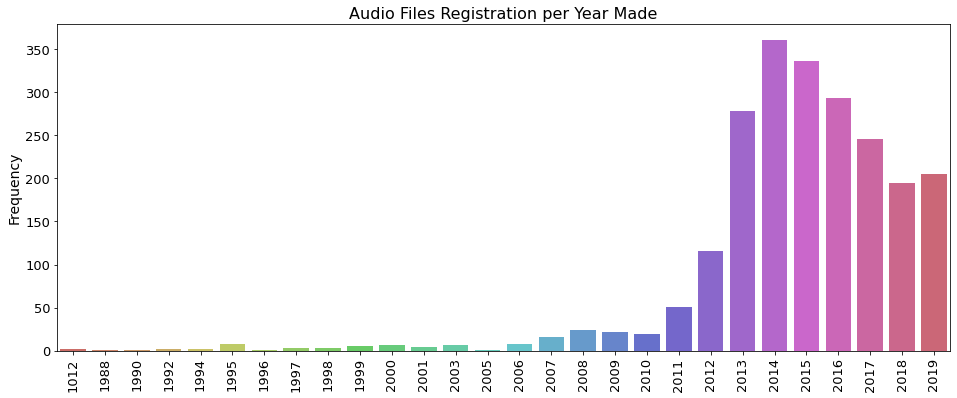

In [62]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(rslt_df['year'], palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

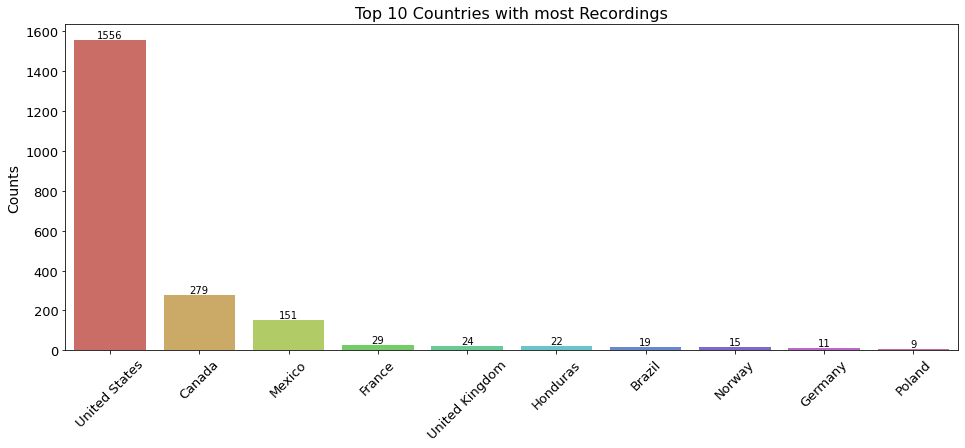

In [63]:
# Top 10 most common countries
top_10 = list(train['country'].value_counts().head(10).reset_index()['index'])
data = train[train['country'].isin(top_10)]

plt.figure(figsize=(16, 6))
ax = sns.countplot(data['country'], palette='hls', order = data['country'].value_counts().index)

ax.bar_label(ax.containers[0])
plt.title("Top 10 Countries with most Recordings", fontsize=16)
plt.ylabel("Counts", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

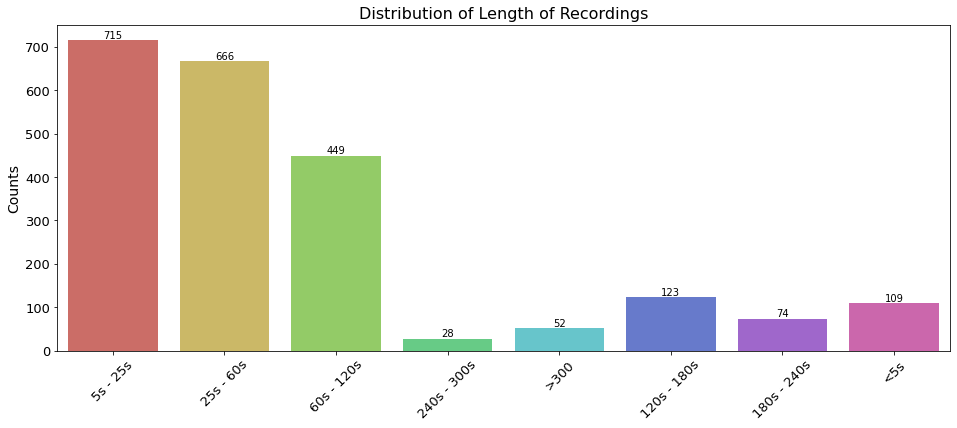

In [64]:
# Creating Interval for *duration* variable
train['duration_interval'] = ">300"
train.loc[train['duration'] < 5, 'duration_interval'] = "<5s"
train.loc[(train['duration'] >= 5) & (train['duration'] <= 25), 'duration_interval'] = "5s - 25s"
train.loc[(train['duration'] > 25) & (train['duration'] <= 60), 'duration_interval'] = "25s - 60s"
train.loc[(train['duration'] > 60) & (train['duration'] <= 120), 'duration_interval'] = "60s - 120s"
train.loc[(train['duration'] > 120) & (train['duration'] <= 180), 'duration_interval'] = "120s - 180s"
train.loc[(train['duration'] > 180) & (train['duration'] <= 240), 'duration_interval'] = "180s - 240s"
train.loc[(train['duration'] > 240) & (train['duration'] <= 300), 'duration_interval'] = "240s - 300s"


plt.figure(figsize=(16, 6))
ax = sns.countplot(train['duration_interval'], palette="hls")
ax.bar_label(ax.containers[0])
plt.title("Distribution of Length of Recordings", fontsize=16)
plt.ylabel("Counts", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [95]:
# Create Full Path so we can access data more easily
base_dir = './'
train['full_path'] = base_dir + train_csv['ebird_code'] + '/' + train['filename']

# Now let's sample a fiew audio files
amered = train[train['ebird_code'] == "amered"].sample(1, random_state = 15)['full_path'].values[0]
greegr = train[train_csv['ebird_code'] == "greegr"].sample(1, random_state = 15)['full_path'].values[0]

amered = amered.replace(amered[len(amered) - 3:], "wav")
greegr = greegr.replace(greegr[len(greegr) - 3:], "wav")

In [96]:
# Amered
ipd.Audio(amered)

In [97]:
ipd.Audio(greegr)

In [98]:
y_amered, sr_amered = librosa.load(amered)
audio_amered, _ = librosa.effects.trim(y_amered)

y_greegr, sr_greegr = librosa.load(greegr)
audio_greegr, _ = librosa.effects.trim(y_greegr)

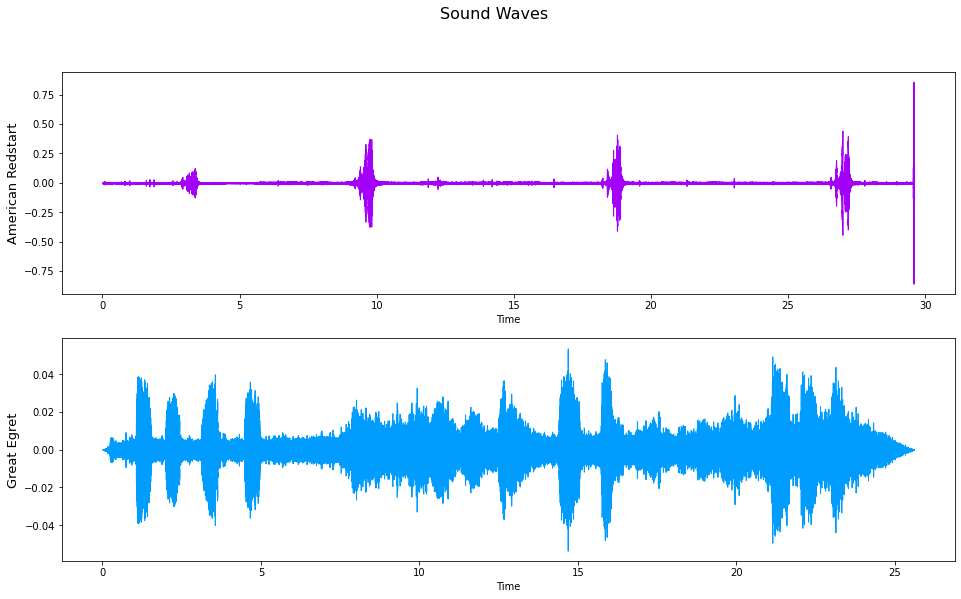

In [99]:
fig, ax = plt.subplots(2, figsize = (16, 9))
fig.suptitle('Sound Waves', fontsize=16)

librosa.display.waveshow(y = audio_amered, sr = sr_amered, color = "#A300F9", ax=ax[0])
librosa.display.waveshow(y = audio_greegr, sr = sr_greegr, color = "#009DFF", ax=ax[1])

for i, name in zip(range(2), ["American Redstart", 'Great Egret']):
    ax[i].set_ylabel(name, fontsize=13)

In [100]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D_amered = np.abs(librosa.stft(audio_amered, n_fft = n_fft, hop_length = hop_length))
D_greegr = np.abs(librosa.stft(audio_greegr, n_fft = n_fft, hop_length = hop_length))

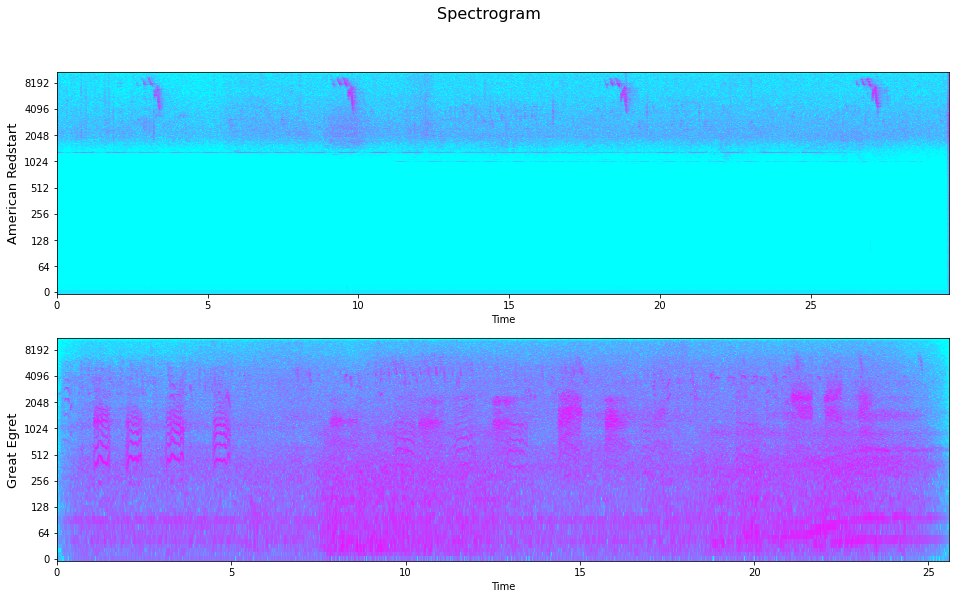

In [110]:
DB_amered = librosa.amplitude_to_db(D_amered, ref = np.max)
DB_greegr = librosa.amplitude_to_db(D_greegr, ref = np.max)

fig, ax = plt.subplots(2, figsize=(16, 9))
fig.suptitle('Spectrogram', fontsize=16)
#fig.delaxes(ax[1, 2])

librosa.display.specshow(DB_amered, sr = sr_amered, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[0])
librosa.display.specshow(DB_greegr, sr = sr_greegr, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'cool', ax=ax[1])

for i, name in zip(range(2), ["American Redstart", 'Great Egret']):
    ax[i].set_ylabel(name, fontsize=13)

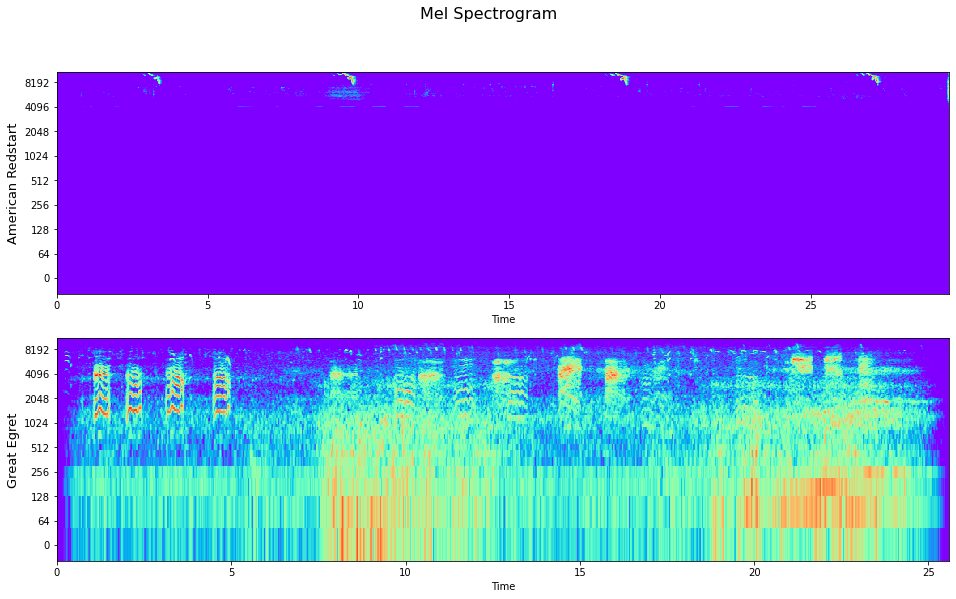

In [112]:
S_amered = librosa.feature.melspectrogram(y_amered, sr=sr_amered)
S_DB_amered = librosa.amplitude_to_db(S_amered, ref=np.max)

S_greegr = librosa.feature.melspectrogram(y_greegr, sr=sr_greegr)
S_DB_greegr = librosa.amplitude_to_db(S_greegr, ref=np.max)

fig, ax = plt.subplots(2, figsize=(16, 9))
fig.suptitle('Mel Spectrogram', fontsize=16)

librosa.display.specshow(S_DB_amered, sr = sr_amered, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[0])
librosa.display.specshow(S_DB_greegr, sr = sr_greegr, hop_length = hop_length, x_axis = 'time', 
                         y_axis = 'log', cmap = 'rainbow', ax=ax[1])

for i, name in zip(range(2), ["American Redstart", 'Great Egret']):
    ax[i].set_ylabel(name, fontsize=13)

In [125]:
from sklearn import metrics

# opening the file in read mode
my_file = open("predict.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
y_pred = data.split("\n")
#print(data_into_list)
my_file.close()


# opening the file in read mode
my_file = open("label.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end splitting the text 
# when newline ('\n') is seen.
y_true = data.split("\n")
#print(data_into_list)
my_file.close()


# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))


[[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0]
 [ 0  0  0  0  9  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 2  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0  0  1  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  1  7  0  0  0  0  0  0  0  0  2  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8